# Lazy_Classification_Breast_Cancer

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
print(tf.__version__)

2.19.0


In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Data Preparation 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=11)
N, D = X_train.shape

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the Model

In [13]:
# Now all the fun Tensorflow stuff

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6537 - loss: 0.6109 - val_accuracy: 0.6755 - val_loss: 0.6388
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7006 - loss: 0.5567 - val_accuracy: 0.7606 - val_loss: 0.5755
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7597 - loss: 0.4730 - val_accuracy: 0.7872 - val_loss: 0.5223
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8118 - loss: 0.4426 - val_accuracy: 0.8298 - val_loss: 0.4766
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8400 - loss: 0.4336 - val_accuracy: 0.8457 - val_loss: 0.4365
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8797 - loss: 0.3882 - val_accuracy: 0.8723 - val_loss: 0.4029
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9061 - loss: 0.3487 - val_accuracy: 0.8777 - val_loss: 0.3749
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9171 - loss: 0.3291 - val_accuracy: 0.

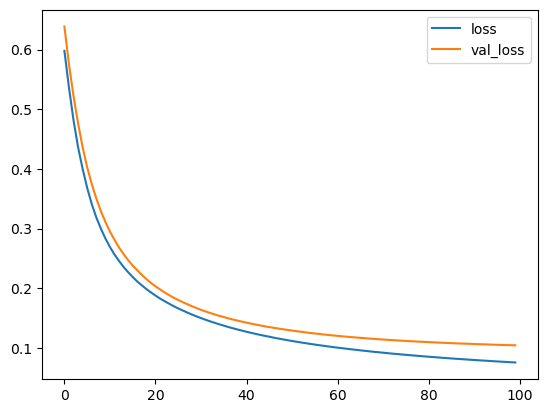

In [14]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend(); 

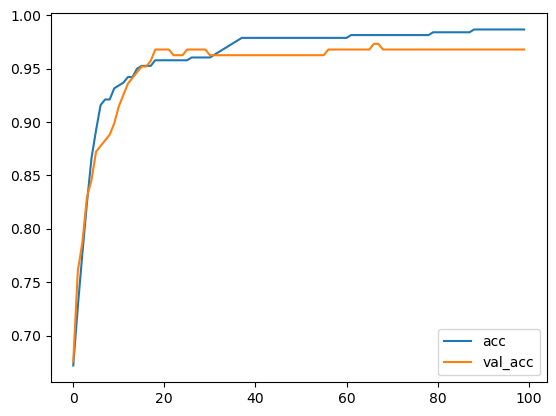

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [16]:
# Make predictions
P = model.predict(X_test)
# print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x);

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [17]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]


In [18]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9680851063829787
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9732 - loss: 0.0819
Evaluate output: [0.1043647974729538, 0.9680851101875305]


## Load and Save Model

In [19]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [20]:
model.save('model.keras')

In [21]:
# Check that the model file exists
!dir 

 Volume in drive C is OS
 Volume Serial Number is B8B6-AE0E

 Directory of C:\Users\cmurr\PythonProjects\Machine_Learning\Tensorflow

06/28/2025  11:47 PM    <DIR>          .
06/26/2025  06:05 PM    <DIR>          ..
06/28/2025  11:43 PM    <DIR>          .ipynb_checkpoints
06/28/2025  11:42 PM            33,263 beginner.ipynb
06/28/2025  11:42 PM            33,543 Flight_Price_Dataset_Short_Course.ipynb
06/28/2025  11:47 PM            94,132 Lazy_Classification_Breast_Cancer.ipynb
06/28/2025  11:47 PM            17,960 linearclassifier.h5
06/28/2025  11:47 PM            15,785 model.keras
               5 File(s)        194,683 bytes
               3 Dir(s)  1,873,938,702,336 bytes free


In [22]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model1 = tf.keras.models.load_model('linearclassifier.h5')
print(model1.layers)
model1.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9732 - loss: 0.0819 


[0.1043647974729538, 0.9680851101875305]

In [23]:
model1 = tf.keras.models.load_model('model.keras')
print(model1.layers)
model1.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]


C:\Users\cmurr\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9732 - loss: 0.0819 


[0.1043647974729538, 0.9680851101875305]